<a href="https://colab.research.google.com/github/Shi-raishi/Research/blob/main/signal__all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ④signalシートのSV  KOMA1～KOMA7<br>
### 主食KOMA1     副菜KOMA2    主菜KOMA3	    乳類KOMA4	   果物KOMA5   	菓子類KOMA6	  酒類KOMA7
主食、副菜、主菜、牛乳・乳製品、果物という5つの料理区分において、「どれだけ食べたらよいか」の目安は「つ（SV）」という単位で示される<br>SVとはサービング（料理の量の単位）の略で、食事バランスガイド独自の考え方

In [1]:
# Google Colabにlingamのライブラリをインストールする
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import print_causal_directions, print_dagc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

['1.26.2', '1.5.3', '0.20.1', '1.8.2']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/'Colab Notebooks'
%ls CSV

/content/drive/MyDrive/Colab Notebooks
'BDHQ フォーマット LongDataSet (f_nutr1).csv'
'BDHQ フォーマット LongDataSet (nutr).csv'
'BDHQ フォーマット LongDataSet (signal).csv'
'BDHQ 児童生徒用フォーマット LongDataSet (food2).csv'
'BDHQ 成人用フォーマット LongDataSet (food).csv'
 Shift-JISに変換したもの/


### 関数定義

In [4]:
# 変数同士の相関を確認
def corrMatrix(df):
  # 相関行列の作成
  corr_matrix = df.corr()

  # 高い相関を持つ変数ペアの抽出
  threshold = 0.5  # 閾値を設定
  high_corr_var = [(column, index, corr_matrix[column][index]) for column in corr_matrix.columns for index in corr_matrix.columns if (corr_matrix[column][index] > threshold) & (column != index)]
  for var_pair in high_corr_var:
      print(var_pair)

In [5]:
# # 特定の変数と他の変数との相関を確認
# def targetCorrMatrix(df):
#   df = 'VEG3'
#   correlations = values_dataframe.corrwith(values_dataframe[df])
#   correlations.sort_values(ascending=False)

In [6]:
# ヒートマップで相関関係の可視化
def heatMap(df):
  plt.figure(figsize=(15, 15))
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
  plt.show()

In [7]:
# 個々の変数の分布を確認
def distribution(df):
  for column in df.columns:
      plt.figure()
      sns.histplot(df[column], kde=True)
      plt.title(column)
      plt.show()

In [8]:
# 変数の0データを確認
def countZeroData(df):
  # 各変数における0の数をカウントし、少ない順にソート
  zero_counts_sorted = (df == 0).sum().sort_values()
  # 各変数における0データ数の表示
  print(zero_counts_sorted)

In [9]:
# 0データの数をグラフで確認
def countAvairableVariable(df):
  # 0が含まれる数をカウント
  zero_counts = (df == 0).sum().sort_values()

  # グラフのサイズを設定
  plt.figure(figsize=(12, 9))

  # 棒グラフの作成
  sns.barplot(x=len(df)-zero_counts.values, y=zero_counts.index)

  # グラフのタイトルとラベルを設定
  plt.title('Number of non-zero data in each variable')
  plt.xlabel('number of non-zero data')
  plt.ylabel('variable name')

  # グラフの表示
  plt.show()

In [10]:
def checksVariables(df):
  # # non-zeroのデータ数を確認
  # countZeroData(df)
  # non-zeroのデータ数をグラフで確認
  countAvairableVariable(df)
  # 相関行列を確認
  corrMatrix(df)
  # ヒートマップ確認
  heatMap(df)
  # 各変数の分布を確認
  # distribution(df)

### データ前処理

In [11]:
# CSVの読み込み
data_nutr = pd.read_csv('./CSV/BDHQ フォーマット LongDataSet (nutr).csv')
data_signal = pd.read_csv('./CSV/BDHQ フォーマット LongDataSet (signal).csv')

In [13]:
print(len(data_nutr),len(data_signal))

3329 3346


## ↓idの重複削除、結合

In [12]:
# data_signal重複を確認
print("data_signal で重複のある行数:", data_signal['ID1'].duplicated(keep=False).sum())

# data_nutr重複を確認
print("data_nutr で重複のある行数:", data_nutr['ID1'].duplicated(keep=False).sum())


data_signal で重複のある行数: 134
data_nutr で重複のある行数: 116


In [13]:
# data_nutrから重複を除去
data_nutr_cleaned = data_nutr.drop_duplicates(subset='ID1', keep=False)
print(len(data_nutr_cleaned))

3213


In [14]:
# 左結合
merged_data = pd.merge(data_signal, data_nutr_cleaned, on='ID1', how='left')
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 3345
Columns: 266 entries, ID1 to filename_y
dtypes: float64(188), int64(73), object(5)
memory usage: 6.8+ MB
None


In [15]:
# 結合後のデータフレームのIDの重複を確認
merged_data['ID1'].duplicated(keep=False).sum()

134

In [16]:
# 結合後のデータフレームのIDの重複を削除
cleaned_data = merged_data.drop_duplicates(subset='ID1',keep=False)# 重複の確認
print(cleaned_data['ID1'].duplicated().sum())
print(len(cleaned_data))

0
3212


In [17]:
print(cleaned_data.info())
print(len(cleaned_data))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 0 to 3301
Columns: 266 entries, ID1 to filename_y
dtypes: float64(188), int64(73), object(5)
memory usage: 6.5+ MB
None
3212


### ↓変数作成


In [18]:
## BMIを作成
# cleaned_dataのコピーを作成（SettingWithCopyWarningというエラーが出るため）
cleaned_data_copy = cleaned_data.copy()

# 新しい列を追加
cleaned_data_copy['BMI'] = cleaned_data_copy['BW'] / ((cleaned_data_copy['BH'] / 100) ** 2)

# 結果を表示
cleaned_data_copy.head(1)

,ID1,ID2_x,ID3_x,STBW,SBMI,SPGLC,SPRT,SFAT,SSFA,SN6,...,C13S,C15SA,C16SI,C17SA,C162,C164,C215N3,C224N6,filename_y,BMI
0,201100001,2015.0,7,64.896784,3,0,3,4,4,3,...,4.390897,43.708411,22.084421,44.630987,46.242804,40.19382,39.545785,19.487288,012（会津若松市）全市成人_BDHQ2012_623件【結合】151013_3,23.214198


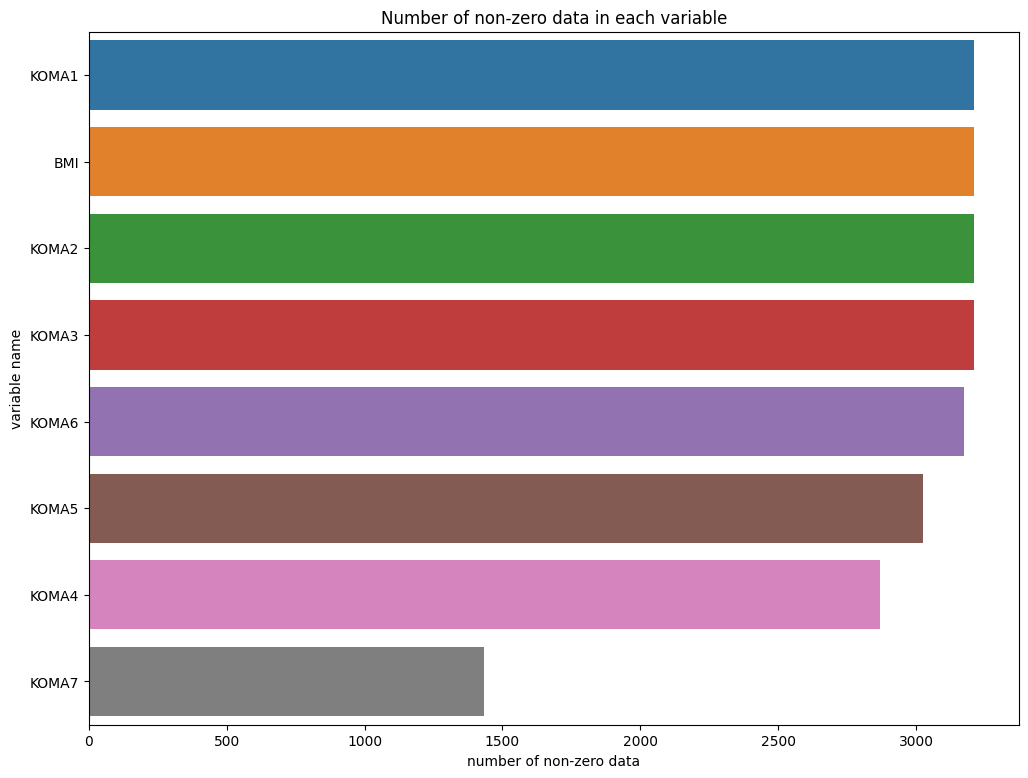

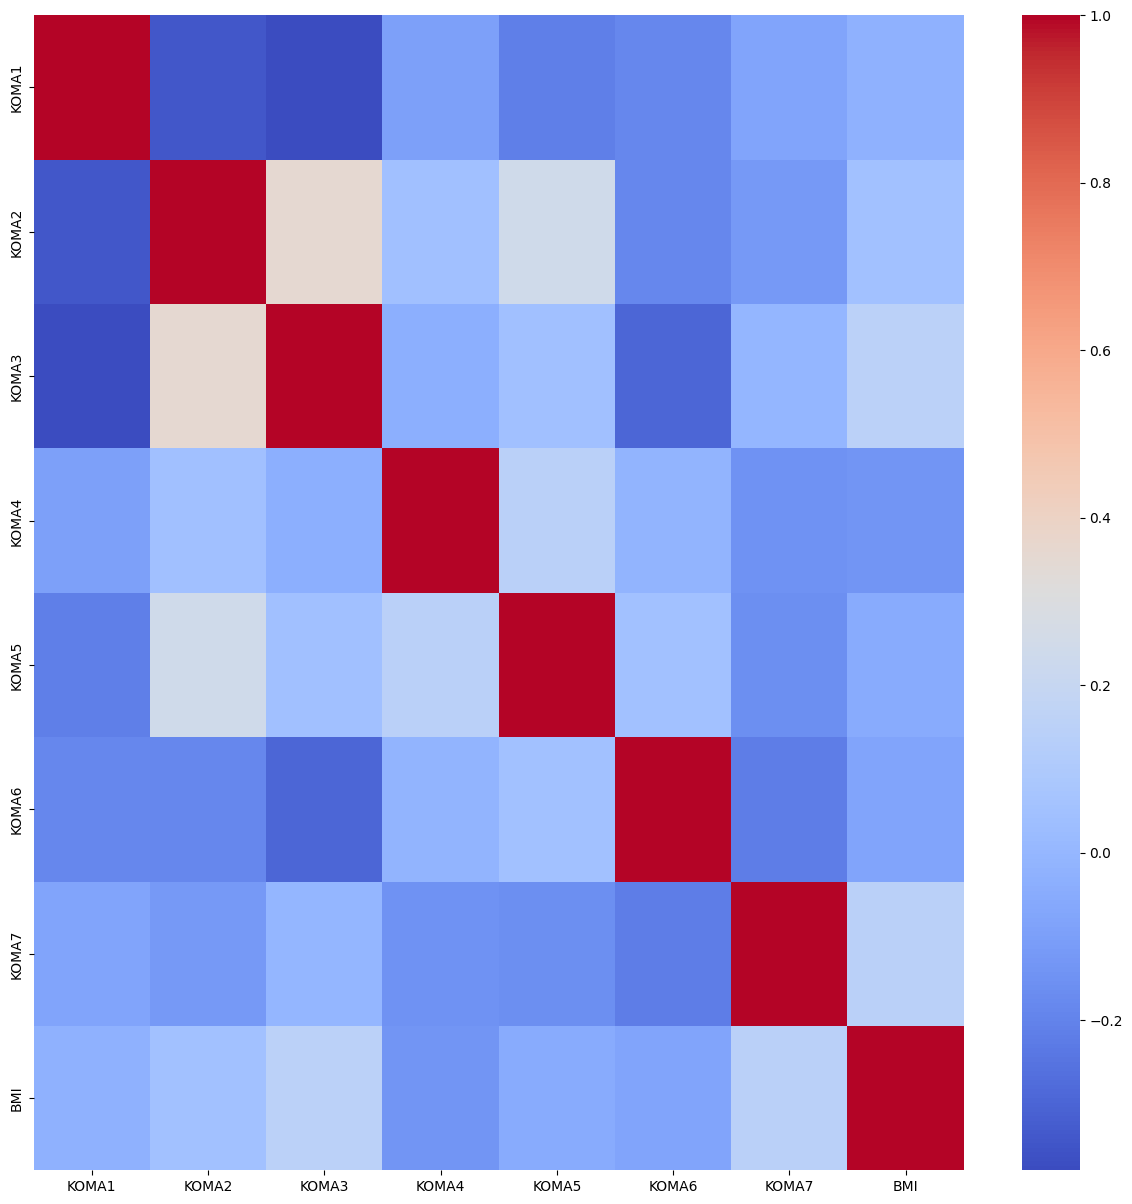

In [19]:
# 変数選択
# 主食   副菜  主菜	   乳類	 果物 	菓子類	酒類
# KOMA1	KOMA2	KOMA3	KOMA4	KOMA5	KOMA6	KOMA7
values_dataframe = cleaned_data_copy.loc[:, 'KOMA1':'KOMA7'].copy()
# データ数と相関の確認
values_dataframe['BMI'] = cleaned_data_copy['BMI']
checksVariables(values_dataframe)

In [20]:
# 変数追加
values_dataframe['AGE'] = cleaned_data_copy['AGE']
values_dataframe['SEX'] = cleaned_data_copy['SEX']

In [21]:
# NA処理
values_dataframe_cleaned = values_dataframe.dropna()

### LiNGAMの関数定義

In [22]:
# 解析に使用する変数の選択（）
def select(df):
    # 基本統計量の確認
    df.describe()

    # 各列について、上:0.5%,下:0.5%のデータを外れ値として除去
    for column in df.columns:
        lower_limit = df[column].quantile(0.005)
        upper_limit = df[column].quantile(0.995)
        df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]

    # 修正されたデータフレームを表示
    df.describe()

    len(df)

    return df

In [23]:
def modeling(selected_columns):
  # 標準化
  scaler = StandardScaler()
  Xy = scaler.fit_transform(selected_columns)

  # モデル作成
  model = lingam.DirectLiNGAM(random_state=1)
  model.fit(Xy)

  # 因果の順番
  print(f"因果の順番\n{model.causal_order_}\n\n")

  # 隣接行列
  print(f"隣接行列\n{model.adjacency_matrix_}\n\n")

  # 推定した因果モデルにおける、誤差同士の独立性のp値
  p_values = model.get_error_independence_p_values(Xy)
  print(f"推定した因果モデルにおける、誤差同士の独立性のp値\n{p_values}\n\n")

  return model

In [24]:
def gragh(model, selected_columns,dagname):
    # 因果グラフの描画
    dot = make_dot(model.adjacency_matrix_, labels=selected_columns.columns.to_list())
    dot.format = 'png'
    dot.render(dagname)
    return dot

In [25]:
def lingam_matrix(df):
    scaler = StandardScaler()
    Xy = scaler.fit_transform(df)

    model = lingam.DirectLiNGAM(random_state=1)
    result = model.bootstrap(Xy, n_sampling=100)
    # sklearn.utils.resampleで重複ありのリサンプリングをしている。リサンプル後のサンプル数は元データと同じ。

    # bootstrappingの各サンプルにおける、因果方向の有無のカウント結果を取得する
    cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.01, split_by_causal_effect_sign=True)
    print_causal_directions(cdc, 100, labels=df.columns.to_list())

    # カウント結果を確率として、隣接行列の形式で表示
    prob = result.get_probabilities(min_causal_effect=0.01)
    print(prob)

    # bootstrappingの各サンプルにおける、DAG(Directed Acyclic Graphs)のカウント結果を取得する
    dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)
    print_dagc(dagc, 100, labels=df.columns.to_list())

    # Total Causal Effects
    causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

    # Assign to pandas.DataFrame for pretty display
    causal_df = pd.DataFrame(causal_effects)
    labels = df.columns.to_list()
    # 'from' 列と 'to' 列のラベルを適用する
    causal_df['from'] = causal_df['from'].apply(lambda x: labels[x])
    causal_df['to'] = causal_df['to'].apply(lambda x: labels[x])
    return causal_df

In [27]:
def LiNGAM(df,dagname):
  selected_columns = select(df)
  model = modeling(selected_columns)
  dot = gragh(model, selected_columns,dagname)
  causal_df = lingam_matrix(selected_columns)
  return dot,causal_df

In [28]:
print(values_dataframe_cleaned.columns.tolist())

['KOMA1', 'KOMA2', 'KOMA3', 'KOMA4', 'KOMA5', 'KOMA6', 'KOMA7', 'BMI', 'AGE', 'SEX']


In [29]:
# 変数を指定するリスト
selected_variables = ['KOMA1', 'KOMA2', 'KOMA3', 'KOMA4', 'KOMA5', 'KOMA6', 'KOMA7', 'BMI']

# 使用する変数を確認
df = values_dataframe_cleaned[selected_variables]
df

,KOMA1,KOMA2,KOMA3,KOMA4,KOMA5,KOMA6,KOMA7,BMI
0,4.343183,6.144547,14.846786,1.399382,1.681957,3.665818,0.158623,23.214198
1,6.153517,4.508196,10.422500,0.000000,0.000000,3.260397,1.250014,25.854639
2,6.646061,4.561708,6.100482,4.225589,1.020010,3.653191,0.241486,19.568236
3,4.942909,5.985746,6.464473,2.566877,0.193382,6.275125,0.332931,29.384757
4,3.576131,4.550807,9.249492,2.815471,2.198952,6.329992,0.292545,22.340297
...,...,...,...,...,...,...,...,...
3294,5.828727,0.136473,4.522311,8.958311,0.184239,1.338803,0.000000,15.061332
3296,3.049348,3.860714,4.351189,1.693973,1.506811,5.844632,0.000000,15.320256
3299,4.747742,0.709455,2.012991,0.917043,0.095242,6.328747,0.000000,18.668680
3300,5.151244,2.282118,5.635752,4.965149,1.223298,2.287184,0.000000,19.113632


In [30]:
# 0data削除
df_filtered = df[(df != 0).all(axis=1)]

# 結果を表示
print(df_filtered.describe())

             KOMA1        KOMA2        KOMA3        KOMA4        KOMA5  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean      3.986899     5.419138     8.391642     1.696323     0.824697   
std       1.466332     2.539318     2.991766     1.259124     0.705339   
min       0.556073     0.166239     0.824727     0.089018     0.044795   
25%       2.913177     3.677990     6.356011     0.694393     0.305359   
50%       3.879629     5.079077     8.059205     1.523493     0.633469   
75%       4.861656     6.626844    10.002874     2.264180     1.139810   
max       9.135888    19.371243    20.464010     8.903245     4.755137   

             KOMA6        KOMA7          BMI  
count  1182.000000  1182.000000  1182.000000  
mean      2.686614     1.655406    23.105399  
std       1.707798     2.094391     3.255018  
min       0.064154     0.005783    13.473917  
25%       1.436295     0.173016    20.829399  
50%       2.378282     0.732732    22.826881  
75% 

因果の順番
[6, 7, 4, 5, 2, 1, 0, 3]


隣接行列
[[ 0.         -0.2762165  -0.34317013  0.         -0.14995282 -0.31981865
  -0.1724759   0.08528154]
 [ 0.          0.          0.21685053  0.          0.20344865 -0.15890173
  -0.15549896  0.        ]
 [ 0.          0.          0.          0.          0.10206112 -0.30497639
  -0.09890027  0.08715511]
 [-0.14597943  0.08736377 -0.07998653  0.          0.10261242 -0.14400073
  -0.0726089   0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.15158417  0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.24801872  0.08341515]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.13571578  0.        ]]


推定した因果モデルにおける、誤差同士の独立性のp値
[[0.00000000e+00 2.18506814e-02 1.10271999e-01 7.29417206e-04
  2.05647941e-01 9.09684971e-01 8.90581660e-12 3.92446063e-02]
 [2.18506814e-02 0.00000000e+00 

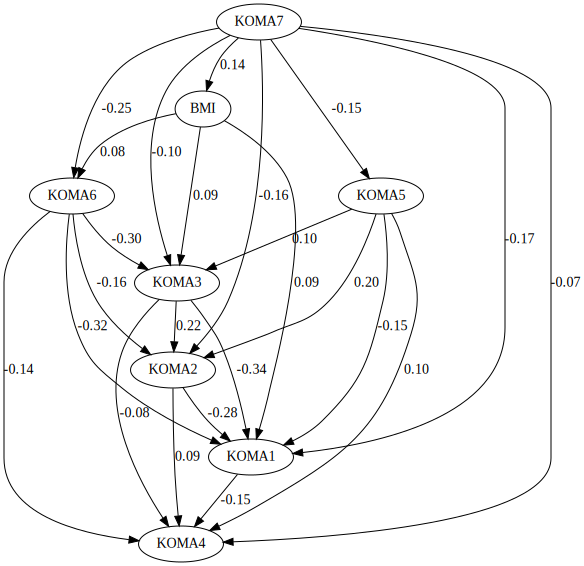

In [31]:
dot,causal_df = LiNGAM(df_filtered,'signal_all_data')
dot

In [32]:
causal_df

,from,to,effect,probability
0,KOMA3,KOMA1,-0.347197,1.00
1,KOMA7,KOMA6,-0.237975,1.00
2,KOMA5,KOMA1,-0.249346,1.00
3,KOMA7,KOMA2,-0.158212,1.00
4,KOMA5,KOMA2,0.226641,1.00
5,KOMA7,KOMA5,-0.151008,0.99
6,KOMA7,BMI,0.134599,0.98
7,KOMA5,KOMA4,0.155696,0.98
8,KOMA6,KOMA1,-0.245086,0.97
9,KOMA2,KOMA1,-0.277471,0.96


## 変数を減らす


In [33]:
print(values_dataframe_cleaned.columns.tolist())

['KOMA1', 'KOMA2', 'KOMA3', 'KOMA4', 'KOMA5', 'KOMA6', 'KOMA7', 'BMI', 'AGE', 'SEX']


因果の順番
[5, 4, 3, 2, 1, 6, 0]


隣接行列
[[ 0.         -0.24709813 -0.36400696 -0.06259887 -0.09858762 -0.33071851
  -0.04785693]
 [ 0.          0.          0.28810657  0.          0.21889418 -0.1359184
   0.        ]
 [ 0.          0.          0.         -0.06920446  0.08564144 -0.31037037
   0.        ]
 [ 0.          0.          0.          0.          0.12297979  0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.13333716 -0.10976132  0.         -0.07259402
   0.        ]]


推定した因果モデルにおける、誤差同士の独立性のp値
[[0.00000000e+00 7.91605916e-05 1.50469521e-04 2.36917840e-12
  2.65823685e-01 6.57035654e-02 2.88157081e-01]
 [7.91605916e-05 0.00000000e+00 9.82436086e-08 1.37030706e-02
  2.47329372e-03 2.79535005e-06 4.01678784e-03]
 [1.50469521e-04 9.82436086e-08 0.00000000e+00 7.21898692e-02
  1.36838872e-01 5.53261874e-11 4.78822176e-02]
 [2.3691

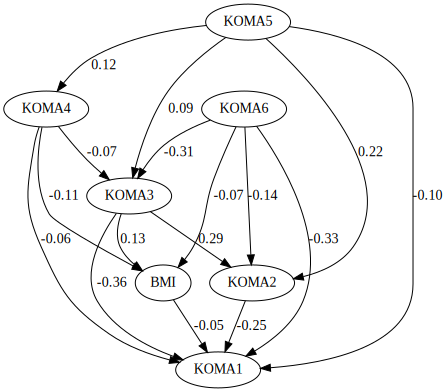

In [34]:
# 変数を指定するリスト(その他野菜、油脂類、果実類を削除)
selected_variables = ['KOMA1', 'KOMA2', 'KOMA3', 'KOMA4', 'KOMA5', 'KOMA6', 'BMI']
# 使用する変数を確認
df = values_dataframe_cleaned[selected_variables]
# 0data削除
df_filtered = df[(df != 0).all(axis=1)]
# LiNGAM
dot,causal_df = LiNGAM(df_filtered,'signal_all_data')
dot

In [36]:
causal_df.head(15)

,from,to,effect,probability
0,KOMA6,KOMA1,-0.166410,1.00
1,KOMA5,KOMA4,0.119277,1.00
2,KOMA5,KOMA1,-0.190457,0.98
3,KOMA5,KOMA2,0.231419,0.98
4,KOMA6,BMI,-0.107423,0.96
5,KOMA3,KOMA2,0.286321,0.95
6,KOMA6,KOMA3,-0.304151,0.95
7,KOMA6,KOMA2,-0.211167,0.94
8,KOMA3,KOMA1,-0.438617,0.93
9,KOMA4,BMI,-0.113104,0.93
